## 목차
1. COVID-19 시각화 - 쥬피터랩
   - 1.1 최종결과물 미리 확인
   - 1.2 분석 및 집계 기준
   - 1.3 데이터 처리 작업
   - 1.4 데이터 시각화
2. COVID-19 시각화 - 장고 하이차트
   - 2.1 최종결과물 미리 확인
   - 2.2 분석 및 집계 기준
   - 2.3 장고에서 하이차트 작성
   - 2.4 파이썬 애니웨어 서버에 배포된 결과물 확인
3. 타이타닉호 시각화
   - 3.1 최종결과물 미리 확인
   - 3.2 타이타닉호 생존/비생존 인원 및 생존률 차트 작성
   - 3.3 파이썬 애니웨어 서버에 배포된 결과물 확인
4. 최종 평가 및 소감
   - 4.1 COVID-19 시각화 평가
   - 4.2 타이타닉호 시각화 평가
   - 4.3 과제 수행 소감 및 평가 기준표 자가 채점 제시

## 1. COVID-19 시각화 - 쥬피터랩

### 1.1 최종 결과물 미리 확인
| 건수 | 인구 대비 건수 |
|---|---|
| ![img COVID-19](https://user-images.githubusercontent.com/55727521/85824161-16a60300-b7ba-11ea-97e4-38a1b99899af.png) | ![img Per Capita COVID-19](https://user-images.githubusercontent.com/55727521/85824198-2d4c5a00-b7ba-11ea-9dfa-80270b749238.png) |

### 1.2 분석 및 집계 기준
- 분석 대상 국가 : Korea, South, Germany, United Kingdom, US, France
- 집계 기준 : 1. 국가별 cases 발생 건수로 집계
               2. 국가별 인구 100만명 당 발생 건수로 집계
- 사용 데이터 : [https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv](https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv)

### 1.3 데이터 처리 작업

In [26]:
# 라이브러리 준비 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
%matplotlib inline 

In [27]:
# 데이터 적재 및 선별
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
print(len(df), '행 x', len(df.columns), '열')

# 분석 대상 국가의 데이터만 선별
countries = ['Korea, South', 'Germany', 'United Kingdom', 'US', 'France']

df = df[df['Country'].isin(countries)]
df

29140 행 x 5 열


,Date,Country,Confirmed,Recovered,Deaths
62,2020-01-22,France,0,0,0
66,2020-01-22,Germany,0,0,0
91,2020-01-22,"Korea, South",1,0,0
174,2020-01-22,US,1,0,0
178,2020-01-22,United Kingdom,0,0,0
...,...,...,...,...,...
29014,2020-06-24,France,197885,75251,29734
29018,2020-06-24,Germany,192871,176422,8928
29043,2020-06-24,"Korea, South",12563,10974,282
29126,2020-06-24,US,2382327,656161,121985


In [28]:
# cases를 종합한 합계 열 생성
df['Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)
df

,Date,Country,Confirmed,Recovered,Deaths,Cases
62,2020-01-22,France,0,0,0,0
66,2020-01-22,Germany,0,0,0,0
91,2020-01-22,"Korea, South",1,0,0,1
174,2020-01-22,US,1,0,0,1
178,2020-01-22,United Kingdom,0,0,0,0
...,...,...,...,...,...,...
29014,2020-06-24,France,197885,75251,29734,302870
29018,2020-06-24,Germany,192871,176422,8928,378221
29043,2020-06-24,"Korea, South",12563,10974,282,23819
29126,2020-06-24,US,2382327,656161,121985,3160473


In [29]:
# pivot()을 사용하여 데이터 재 구조화
df = df.pivot(index='Date', columns='Country', values='Cases')
df

Country,France,Germany,"Korea, South",US,United Kingdom
Date,,,,,
2020-01-22,0,0,1,1,0
2020-01-23,0,0,1,1,0
2020-01-24,2,0,2,2,0
2020-01-25,3,0,2,2,0
2020-01-26,3,0,3,5,0
...,...,...,...,...,...
2020-06-20,300796,374174,23569,2992477,348573
2020-06-21,301147,374907,23599,3023767,349839
2020-06-22,301783,375810,23673,3072902,350814


In [30]:
# 데이터 프레임의 인덱스 확인 및 변경
countries = list(df.columns)
df.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-06-15', '2020-06-16', '2020-06-17', '2020-06-18',
               '2020-06-19', '2020-06-20', '2020-06-21', '2020-06-22',
               '2020-06-23', '2020-06-24'],
              dtype='datetime64[ns]', name='Date', length=155, freq=None)

In [31]:
covid = df.reset_index('Date')
covid.index

RangeIndex(start=0, stop=155, step=1)

In [32]:
covid.set_index(['Date'], inplace=True)
covid.columns = countries

covid

,France,Germany,"Korea, South",US,United Kingdom
Date,,,,,
2020-01-22,0,0,1,1,0
2020-01-23,0,0,1,1,0
2020-01-24,2,0,2,2,0
2020-01-25,3,0,2,2,0
2020-01-26,3,0,3,5,0
...,...,...,...,...,...
2020-06-20,300796,374174,23569,2992477,348573
2020-06-21,301147,374907,23599,3023767,349839
2020-06-22,301783,375810,23673,3072902,350814


In [33]:
# 인구 대비 건수 계산(건/백만명)
populations = {'Korea, South':51269185, 'Germany': 83783942 , 'United Kingdom': 67886011 , 'US': 331002651, 'France': 65273511}

percapita = covid.copy()
for country in list(percapita.columns):
    percapita[country] = percapita[country]/populations[country]*1000000

percapita

,France,Germany,"Korea, South",US,United Kingdom
Date,,,,,
2020-01-22,0.000000,0.000000,0.019505,0.003021,0.000000
2020-01-23,0.000000,0.000000,0.019505,0.003021,0.000000
2020-01-24,0.030640,0.000000,0.039010,0.006042,0.000000
2020-01-25,0.045960,0.000000,0.039010,0.006042,0.000000
2020-01-26,0.045960,0.000000,0.058515,0.015106,0.000000
...,...,...,...,...,...
2020-06-20,4608.239934,4465.939309,459.710838,9040.643605,5134.680840
2020-06-21,4613.617306,4474.688002,460.295985,9135.174570,5153.329749
2020-06-22,4623.360922,4485.465723,461.739347,9283.617490,5167.692060


### 1.3 데이터 시각화
#### cases 발생 건수로 시각화

Text(2020-01-23 00:00:00, -632094.6, 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv')

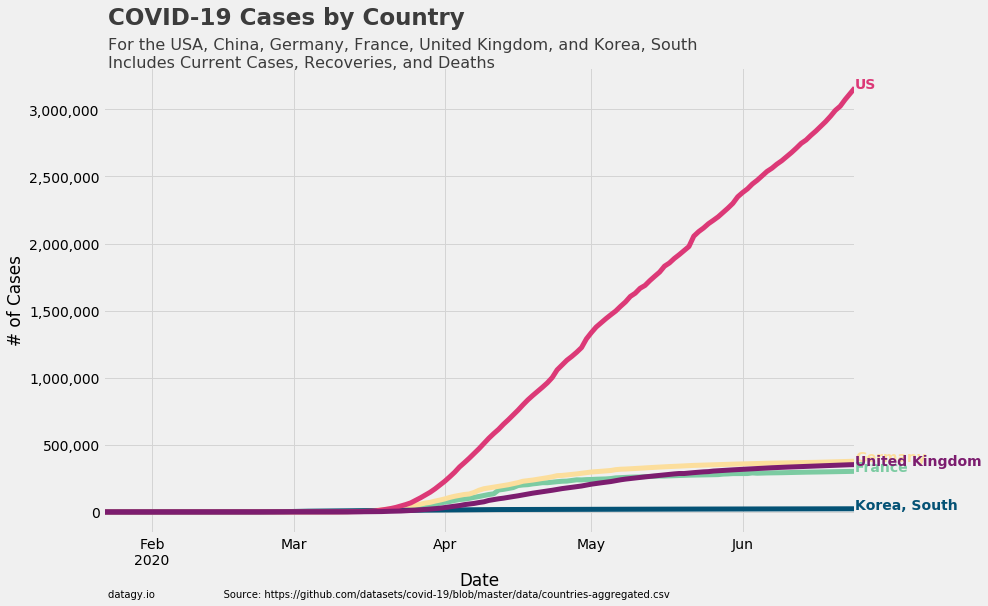

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker

colors = {'Korea, South':'#045275', 'France':'#7CCBA2', 'Germany':'#FCDE9C', 'US':'#DC3977', 'United Kingdom':'#7C1D6F'}
plt.style.use('fivethirtyeight')

for country in countries:
    plot = covid[country].plot(figsize=(12,8), color=colors[country], linewidth=5, legend=False)

plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
# 궤선 색상 지정
plot.grid(color='#d4d4d4')
# 축 레이블 지정
plot.set_xlabel('Date')
plot.set_ylabel('# of Cases')

for country in list(colors.keys()):
    plot.text(x = covid.index[-1], y = covid[country].max(), 
              color = colors[country], s = country, weight = 'bold')

plot.text(x = covid.index[1], y = int(covid.max().max())*1.15, 
          s = "COVID-19 Cases by Country", fontsize = 23, 
          weight = 'bold', alpha = .75)
plot.text(x = covid.index[1], y = int(covid.max().max())*1.05, 
          s = "For the USA, China, Germany, France, United Kingdom, and Korea, South\nIncludes Current Cases, Recoveries, and Deaths", 
          fontsize = 16, alpha = .75)
plot.text(x = percapita.index[1], y = -int(covid.max().max())/5,
          s = 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', 
          fontsize = 10)

#### 인구 100만명당 발생 건수로 시각화

Text(2020-01-23 00:00:00, -1909.6, 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv')

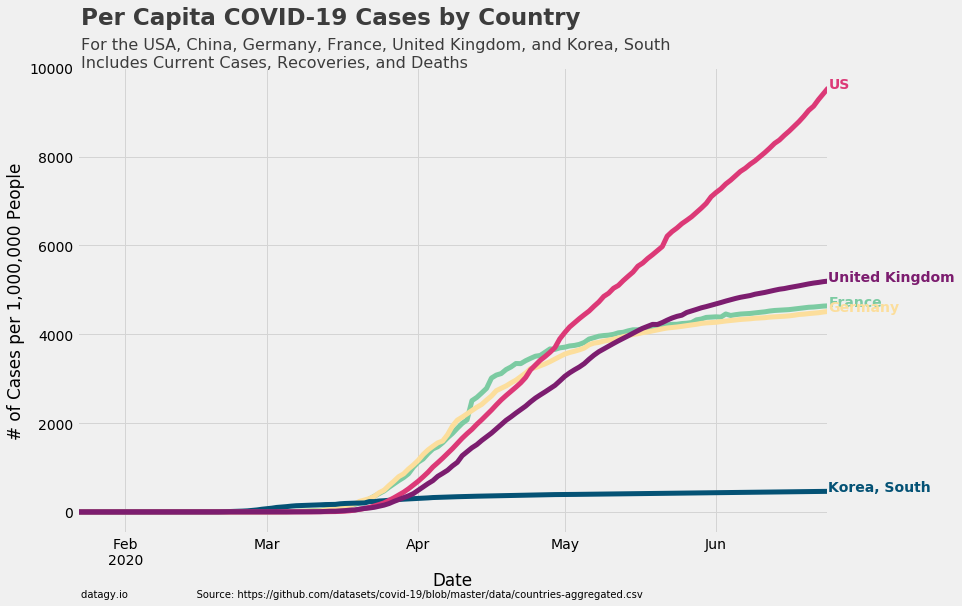

In [35]:
for country in countries:
    percapitaplot = percapita[country].plot(
        figsize=(12,8), 
        color=colors[country], linewidth=5, legend=False)

percapitaplot.grid(color='#d4d4d4')
percapitaplot.set_xlabel('Date')
percapitaplot.set_ylabel('# of Cases per 1,000,000 People')
for country in list(colors.keys()):
    percapitaplot.text(
        x = percapita.index[-1], y = percapita[country].max(), color = colors[country], s = country, weight = 'bold')
percapitaplot.text(
    x = percapita.index[1], y = int(percapita.max().max())*1.15,
    s = "Per Capita COVID-19 Cases by Country", fontsize = 23, 
    weight = 'bold', alpha = .75)
percapitaplot.text(
    x = percapita.index[1], y = int(percapita.max().max())*1.05, 
    s = "For the USA, China, Germany, France, United Kingdom, and Korea, South\nIncludes Current Cases, Recoveries, and Deaths", 
    fontsize = 16, alpha = .75)
percapitaplot.text(
    x = percapita.index[1], y = -int(percapita.max().max())/5,
    s = 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', 
    fontsize = 10)

## 2. COVID-19 시각화 - 장고 하이차트

### 2.1 최종 결과물 미리 확인
| 건수 | 인구 대비 건수 |
|---|---|
| ![covid19](https://user-images.githubusercontent.com/55727521/85824207-32110e00-b7ba-11ea-8e32-5dc8fa549818.JPG) | ![per capita covid19](https://user-images.githubusercontent.com/55727521/85824204-30dfe100-b7ba-11ea-9bc1-3d5522e0c9ff.JPG) |

### 2.2 분석 및 집계 기준
- 분석 대상 국가 : Korea, South, Germany, United Kingdom, US, France
- 집계 기준 : 1. 국가별 cases 발생 건수로 집계
               2. 국가별 인구 100만명 당 발생 건수로 집계
- 사용 데이터 : [https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv](https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv)

### 2.3 장고에서 하이차트 작성

##### * 앱 작성 및 경로 수정 과정은 생략함*

#### 데이터를 처리할 뷰 작성(발생 건수 집계)
```PYTHON {.line-numbers}
# chart/views.py
# ...
def covid_cases(request):
    import pandas as pd
    df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
    countries = ['Korea, South', 'Germany', 'United Kingdom', 'US', 'France']
    df = df[df['Country'].isin(countries)]

    df['Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)
    df = df.pivot(index='Date', columns='Country', values='Cases')

    Germany_Series = df.Germany.tolist()
    US_Series = df.US.tolist()
    France_Series = df.France.tolist()
    Korea_Series = df['Korea, South'].tolist()
    UK_Series = df['United Kingdom'].tolist()

    date = df.index.tolist()
    datee = list()
    for i in date:
        datee.append(i.strftime('%Y-%m-%d'))

    return render(request, 'covid_cases.html', {
        'date': json.dumps(datee),
        'Germany_Series': json.dumps(Germany_Series),
        'US_Series': json.dumps(US_Series),
        'France_Series': json.dumps(France_Series),
        'Korea_Series': json.dumps(Korea_Series),
        'UK_Series': json.dumps(UK_Series)
    })
```

#### covid_cases.html 템플릿 추가
```HTML {.line-numbers}
<!--templates/covid_cases.html-->
<!doctype html>
<html>
<head>
    <meta charset="utf-8">
    <title>Django Highcharts Example</title>
</head>
<body>
    <a href="{% url 'home' %}">Return to homepage</a>
    <div id="container"></div>
    <script src="https://code.highcharts.com/highcharts.src.js"></script>
    <script>
        Highcharts.chart('container', {

            title: {
                text: 'covid-19 Cases by Country'
            },

            subtitle: {
                text: 'For the USA, China, Germany, France, United Kingdom, and Korea, South Includes Current Cases, Recoveries, and Deaths'
            },

            yAxis: {
                title: {
                    text: '합계'
                }
            },

            xAxis: {
                categories: {{ date|safe }}
            },

            legend: {
                 layout: 'vertical',
                align: 'left',
                x: 120,
                verticalAlign: 'top',
                y: 100,
                floating: true
            },

            series: [{
                name: 'Germany',
                data: {{ Germany_Series }}
            }, {
                name: 'US',
                data: {{ US_Series }}
            }, {
                name: 'France',
                data: {{ France_Series }}
            }, {
                name: 'Korea',
                data: {{ Korea_Series }}
            }, {
                name: 'United Kingdom',
                data: {{ UK_Series }}
            }],

            responsive: {
                rules: [{
                    condition: {
                        maxWidth: 500
                    },
                    chartOptions: {
                        legend: {
                            layout: 'horizontal',
                            align: 'center',
                            verticalAlign: 'bottom'
                        }
                    }
                }]
            }

        });
    </script>
</body>
</html>
```

#### 데이터를 처리할 뷰 작성(인구 100만명 당 발생 건수 집계)
```PYTHON {.line-numbers}
# chart/views.py
# ...
def covid_cases_per_capita(request):
    import pandas as pd
    df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
    countries = ['Korea, South', 'Germany', 'United Kingdom', 'US', 'France']
    df = df[df['Country'].isin(countries)]

    df['Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)
    df = df.pivot(index='Date', columns='Country', values='Cases')

    populations = {'Korea, South': 51269185, 'Germany': 83783942, 'United Kingdom': 67886011, 'US': 331002651,
                   'France': 65273511}
    percapita = df.copy()
    for country in list(percapita.columns):
        percapita[country] = percapita[country] / populations[country] * 1000000

    Germany_Series = percapita.Germany.tolist()
    US_Series = percapita.US.tolist()
    France_Series = percapita.France.tolist()
    Korea_Series = percapita['Korea, South'].tolist()
    UK_Series = percapita['United Kingdom'].tolist()

    date = percapita.index.tolist()
    datee = list()
    for i in date:
        datee.append(i.strftime('%Y-%m-%d'))

    return render(request, 'covid_cases_per_capita.html', {
        'date': json.dumps(datee),
        'Germany_Series': json.dumps(Germany_Series),
        'US_Series': json.dumps(US_Series),
        'France_Series': json.dumps(France_Series),
        'Korea_Series': json.dumps(Korea_Series),
        'UK_Series': json.dumps(UK_Series)
    })
```

#### 실행 결과
![covid19](https://user-images.githubusercontent.com/55727521/85824207-32110e00-b7ba-11ea-8e32-5dc8fa549818.JPG)

#### covid_cases_per_capita.html 템플릿 추가
```HTML {.line-numbers}
<!--templates/covid_cases_per_capita.html-->
<!doctype html>
<html>
<head>
    <meta charset="utf-8">
    <title>Django Highcharts Example</title>
</head>
<body>
    <a href="{% url 'home' %}">Return to homepage</a>
    <div id="container"></div>
    <script src="https://code.highcharts.com/highcharts.src.js"></script>
    <script>
        Highcharts.chart('container', {

            title: {
                text: 'Per Capita covid-19 Cases by Country'
            },

            subtitle: {
                text: 'For the USA, China, Germany, France, United Kingdom, and Korea, South Includes Current Cases, Recoveries, and Deaths'
            },

            yAxis: {
                title: {
                    text: '100만명 당 발생'
                }
            },

            xAxis: {
                categories: {{ date|safe }}
            },

            legend: {
                 layout: 'vertical',
                align: 'left',
                x: 120,
                verticalAlign: 'top',
                y: 100,
                floating: true
            },

            series: [{
                name: 'Germany',
                data: {{ Germany_Series }}
            }, {
                name: 'US',
                data: {{ US_Series }}
            }, {
                name: 'France',
                data: {{ France_Series }}
            }, {
                name: 'Korea',
                data: {{ Korea_Series }}
            }, {
                name: 'United Kingdom',
                data: {{ UK_Series }}
            }],

            responsive: {
                rules: [{
                    condition: {
                        maxWidth: 500
                    },
                    chartOptions: {
                        legend: {
                            layout: 'horizontal',
                            align: 'center',
                            verticalAlign: 'bottom'
                        }
                    }
                }]
            }

        });
    </script>
</body>
</html>
```

#### 실행결과
![per capita covid19](https://user-images.githubusercontent.com/55727521/85824204-30dfe100-b7ba-11ea-9bc1-3d5522e0c9ff.JPG)

#### 2.4 파이썬 애니웨어 서버에 배포된 결과물 확인
- 발생 건수 집계
![pythonanywhere1](https://user-images.githubusercontent.com/55727521/85826176-06445700-b7bf-11ea-8d3b-600d18807bff.JPG)
- 서버 주소 [http://serindv.pythonanywhere.com/covid_cases/](http://serindv.pythonanywhere.com/covid_cases/) 에서 확인 가능

- 인구 100만명 당 발생 건수 집계
![pythonanywhere2](https://user-images.githubusercontent.com/55727521/85826178-07758400-b7bf-11ea-96d6-3a608594a04e.JPG)
- 서버 주소 [http://serindv.pythonanywhere.com/covid_cases_per_capita/](http://serindv.pythonanywhere.com/covid_cases_per_capita/) 에서 확인 가능

## 3. 타이타닉호 시각화
   - 3.3 서버에 배포된 결과물 확인

### 3.1 최종 결과물 미리 확인
![titanic](https://user-images.githubusercontent.com/55727521/85824206-32110e00-b7ba-11ea-9240-13ded246e993.JPG)

### 3.2 좌석 등급에 따른 타이타닉호 생존/비생존 인원 및 생존률 차트 작성
##### * 수업에서 작성하였던 앱 작성 및 경로 수정 과정과 DB 적재 및 DB작업 과정은 생략함*

#### 데이터를 처리할 뷰 작성
```PYTHON {.line-numbers}
# chart/views.py
# ...
def ticket_class_view(request):
    dataset = Passenger.objects \
        .values('ticket_class') \
        .annotate(survived_count=Count('ticket_class', filter=Q(survived=True)),
                  not_survived_count=Count('ticket_class', filter=Q(survived=False))) \
        .order_by('ticket_class')

    # 빈 리스트 3종 준비
    categories = list()             # for xAxis
    survived_series = list()        # for series named 'Survived'
    not_survived_series = list()    # for series named 'Not survived'
    survival_rate_series = list()   # for series named 'survival_rate_series'

    # 리스트 3종에 형식화된 값을 등록
    for entry in dataset:
        categories.append('%s 등석' % entry['ticket_class'])    # for xAxis
        survived_series.append(entry['survived_count'])          # for series named 'Survived'
        not_survived_series.append(entry['not_survived_count'])  # for series named 'Not survived'
        survival_rate_series.append(entry['survived_count']/(entry['survived_count']+entry['not_survived_count'])*100)  # '생존자/(생존자+비생존자)*100'으로 생존률 계산

    # json.dumps() 함수로 리스트 3종을 JSON 데이터 형식으로 반환
    return render(request, 'ticket_class.html', {
        'categories': json.dumps(categories),
        'survived_series': json.dumps(survived_series),
        'not_survived_series': json.dumps(not_survived_series),
        'survival_rate_series': json.dumps(survival_rate_series)
    })
```

#### ticket_class.html 템플릿 추가
```HTML {.line-numbers}
<!--templates/ticket_class.html-->
<!doctype html>
<html>
<head>
    <meta charset="utf-8">
    <title>Django Highcharts Example</title>
</head>
<body>
    <a href="{% url 'home' %}">Return to homepage</a>
    <div id="container"></div>
    <script src="https://code.highcharts.com/highcharts.src.js"></script>
    <script>
        Highcharts.chart('container', {
            chart: {
                zoomType: 'xy'
            },
            title: {
                text: '좌석 등급에 따른 타이타닉호 생존/사망 인원 및 생존율'
            },
            xAxis: {
                categories: {{ categories|safe }}  /* safe 필터 */
            },
            yAxis: [{ // Primary yAxis
                labels: {
                    format: '{value}%',
                    style: {
                        color: Highcharts.getOptions().colors[0]
                    }
                },
                title: {
                    text: '생존률',
                    style: {
                        color: Highcharts.getOptions().colors[0]
                    }
                }
            }, { // Secondary yAxis
                title: {
                    text: '인원',
                    style: {
                        color: Highcharts.getOptions().colors[1]
                    }
                },
                labels: {
                    format: '{value} 명',
                    style: {
                        color: Highcharts.getOptions().colors[1]
                    }
                },
                opposite: true
            }],
             tooltip: {
                shared: true
            },
            legend: {
                layout: 'vertical',
                align: 'left',
                x: 120,
                verticalAlign: 'top',
                y: 100,
                floating: true,
                backgroundColor:
                    Highcharts.defaultOptions.legend.backgroundColor || // theme
                    'rgba(255,255,255,0.25)'
            },
            series: [{
                name: '생존',
                type: 'column',
                yAxis: 1,
                data: {{ survived_series }},
                color: 'green'
            }, {
                name: '사망',
                type: 'column',
                yAxis: 1,
                data: {{ not_survived_series }},
                color: 'red'
            }, {
                name: '생존률',
                type: 'spline',
                data: {{ survival_rate_series }},
                color: Highcharts.getOptions().colors[0]
            }]
        });
    </script>
</body>
</html>
```

- yAxis를 두 개 지정하여 이중 y축 차트를 그림

#### 실행 결과
![titanic](https://user-images.githubusercontent.com/55727521/85824206-32110e00-b7ba-11ea-9240-13ded246e993.JPG)

#### 2.4 파이썬 애니웨어 서버에 배포된 결과물 확인
- 좌석 등급에 따른 타이타닉호 생존/사망 인원 및 생존율
![pythonanywhere3](https://user-images.githubusercontent.com/55727521/85826181-080e1a80-b7bf-11ea-8594-62cf64f99e9a.JPG)
- 서버 주소 [http://serindv.pythonanywhere.com/ticket-class/](http://serindv.pythonanywhere.com/ticket-class/) 에서 확인 가능

## 4. 최종 평가 및 소감
   - 
   - 
   - 4.3 과제 수행 소감

#### 4.1 COVID-19 시각화 평가

- 발생 건수로 시각화
| 쥬피터랩 | 장고 하이차트 |
|---|---|
| ![img COVID-19](https://user-images.githubusercontent.com/55727521/85824161-16a60300-b7ba-11ea-97e4-38a1b99899af.png) | ![covid19](https://user-images.githubusercontent.com/55727521/85824207-32110e00-b7ba-11ea-8e32-5dc8fa549818.JPG) |

- 인구 100만명 당 발생건수로 시각화
| 쥬피터랩 | 장고 하이차트 |
|---|---|
| ![img Per Capita COVID-19](https://user-images.githubusercontent.com/55727521/85824198-2d4c5a00-b7ba-11ea-9dfa-80270b749238.png) | ![per capita covid19](https://user-images.githubusercontent.com/55727521/85824204-30dfe100-b7ba-11ea-9bc1-3d5522e0c9ff.JPG) |

- 전반적인 차트의 모양은 쥬피터랩과 장고 하이차트에서 작성한 결과가 유사한 형태를 보임
  - 분석 국가나 집계 기준이 같게 설정된 것을 알 수 있음
- 장고 하이차트에서 작성한 차트의 경우 쥬피터랩에서 작성한 차트에 비해 x축의 날짜 처리 형태가 보기 좋지 않음

#### 4.2 타이타닉호 시각화 평가

- 좌석 등급에 따른 타이타닉호 생존/사망 인원 및 생존율
![titanic](https://user-images.githubusercontent.com/55727521/85824206-32110e00-b7ba-11ea-9240-13ded246e993.JPG)

- 각 좌석 등급별로 생존/비생존 인원을 막대그래프로 색 구분하여 나타내었고, 각 좌석 등급별 생존율을 선그래프로 나타내었다.
  - 인원/생존율의 두 가지 y축 기준 설정이 무사히 잘 된 것으로 보인다.

#### 4.3 과제 수행 소감 및 평가 기준표 자가 채점 제시

##### - 자가 채점표
![score](https://user-images.githubusercontent.com/55727521/85828933-65f13100-b7c4-11ea-85e7-dede0a60a459.JPG)
- 위의 평가들을 종합하여 자가 채점표를 작성하였음
  - 보고서 품질 항목은 자가 채점 항목이 아니라고 판단하여 - 처리

##### - 과제 수행 소감
   - 보완점 및 도전 과제
       - 장고 하이차트에서 작성한 차트의 x축의 날짜 처리를 더 깔끔하게 하는 방법에 대한 공부가 필요함
       - 교수님께서 예시로 제시하신 장고 하이차트의 경우, 차트의 저장 등이 가능하였으나 현재 내가 구현한 사이트에서는 불가능함. -> 차트의 보완이 필요
       - COVID-19 시각화의 경우, 다른 기준 혹은 다른 국가들의 분석을 더 진행해보면 좋을 것 같음
       
   - 배운점 및 느낀점
       - COVID-19 차트를 작성할 때, 발생 건수와 인구 당 발생 건수로 분석한 결과가 확연한 차이가 있다는 점에서 어떤 데이터를 시각화 할 때, 접근하는 방식 등이 매우 중요함을 다시 한 번 깨달았다.
       - 장고 하이차트의 경우, 쥬피터랩과 달리 웹에서 배포가 가능한데 이를 직접 구현하고 배포해낼 수 있었던 것이 뿌듯하기도 하고 재미있었다.
       - 쥬피터랩을 통한 시각화 뿐 아니라 장고를 통한 시각화가 가능하다는 점에서 여러가지 도구를 사용하는 방법에 대한 공부가 필요함을 느꼈으며, 미흡한 부분도 있지만 과제 수행을 무사히 해냈다는 점에서 한 학기동안 많은 것을 배울 수 있었다는 생각이 들었다.